# Chapter 1: Introduction to Reinforcement Learning
Examples use render mode `rgb_array`.

## Fundamentals of reinforcement learning

## Navigating the RL framework

#### Pseudo-code
```
# RL interaction loop
env = create_environment()
state = env.get_initial_state()
for i in range(n_iterations):
    action = choose_action(state)
    state, reward = env.execute(action)
    update_knowledge(state, action, reward)
```

In [ ]:
# Numerical example
import numpy as np
expected_rewards = np.array([1, 6, 3])
discount_factor = 0.9
discounts = np.array([discount_factor ** i for i in range(len(expected_rewards))])
print(f"Discounts: {discounts}")

discounted_return = np.sum(expected_rewards * discounts)
print(f"The discounted return is {discounted_return}")

## Interacting with Gymnasium environments
[CartPole](https://gymnasium.farama.org/environments/classic_control/cart_pole/)

In [ ]:
# Creating and initializing the environment
import gymnasium as gym
env = gym.make('CartPole', render_mode='rgb_array')
state, info = env.reset(seed=42)
print(state)

In [ ]:
# Visualizing the state
import matplotlib.pyplot as plt
state_image = env.render()
plt.imshow(state_image)
plt.show()

In [ ]:
# Visualizing the state
import matplotlib.pyplot as plt
def render():
    state_image = env.render()
    plt.imshow(state_image)
    plt.show()
# Call function
render()

In [ ]:
action = 1
state, reward, terminated, _, _ = env.step(action)
print("State: ", state)
print("Reward: ", reward)
print("Terminated: ", terminated)

In [ ]:
# Interaction loops
while not terminated:
    action = 1 # Move to the right
    state, reward, terminated, _, _ = env.step(action)
    render()

# Chapter 2: Model-based Learning

## Markov Decision Processes

In [9]:
#Gymnasium states and actions
import gymnasium as gym
env = gym.make('FrozenLake', is_slippery=True)
print(env.action_space)
print(env.observation_space)
print("Number of actions: ", env.action_space.n)
print("Number of states: ", env.observation_space.n)
# Discrete(4)
# Discrete(16)
# Number of actions: 4
# Number of states: 16

Discrete(4)
Discrete(16)
Number of actions:  4
Number of states:  16


In [10]:
#Gymnasium rewards and transitions
# env.unwrapped.P : dictionary where keys are state-action pairs
# print(env.unwrapped.P[state][action])

#Gymnasium rewards and transitions - example
state = 6
action = 0
print(env.unwrapped.P[state][action])


[(0.3333333333333333, 2, 0.0, False), (0.3333333333333333, 5, 0.0, True), (0.3333333333333333, 10, 0.0, False)]


## Policies and state-value functions
This section seems to use a custom environment and so the code in this section can not be run without modification.

In [ ]:
#Grid world example: policy
# 0: left, 1: down, 2: right, 3: up
policy = {
    0:1, 1:2, 2:1,
    3:1, 4:3, 5:1,
    6:2, 7:3
}
state, info = env.reset()
terminated = False
while not terminated:
    action = policy[state]
    state, reward, terminated, _, _ = env.step(action)

In [12]:
#Computing state-values
def compute_state_value(state):
    if state == terminal_state:
        return 0
    action = policy[state]
    _, next_state, reward, _ = env.unwrapped.P[state][action][0]
    return reward + gamma * compute_state_value(next_state)

In [14]:
#Computing state-values
terminal_state = 8
gamma = 1
V = {state: compute_state_value(state) for state in range(num_states)}
print(V)

#Changing policies
# 0: left, 1: down, 2: right, 3: up
policy_two = {
    0:2, 1:2, 2:1,
    3:2, 4:2, 5:1,
    6:2, 7:2
}
V_2 = {state: compute_state_value(state) for state in range(num_states)}
print(V_2)


NameError: name 'num_states' is not defined

## Action-value functions

In [ ]:
#Computing Q-values
def compute_q_value(state, action):
    if state == terminal_state:
        return None
    _, next_state, reward, _ = env.unwrapped.P[state][action][0]
    return reward + gamma * compute_state_value(next_state)

In [ ]:
#Computing Q-values
Q = {
    (state, action): compute_q_value(state, action)
    for state in range(num_states)
    for action in range(num_actions)
}
print(Q)

#Computing Q-values
# {
#     (0, 0): 0, (0, 1): 1, (0, 2): 7, (0, 3): 0,
#     (1, 0): 0, (1, 1): 5, (1, 2): 8, (1, 3): 7,
#     (2, 0): 7, (2, 1): 9, (2, 2): 8, (2, 3): 8,
#     (3, 0): 1, (3, 1): 2, (3, 2): 5, (3, 3): 0,
#     (4, 0): 1, (4, 1): 3, (4, 2): 9, (4, 3): 7,
#     (5, 0): 5, (5, 1): 10, (5, 2): 9, (5, 3): 8,
#     (6, 0): 2, (6, 1): 2, (6, 2): 3, (6, 3): 1,
#     (7, 0): 2, (7, 1): 3, (7, 2): 10, (7, 3): 5,
#     (8, 0): None, (8, 1): None, (8, 2): None, (8, 3): None
# }

In [ ]:
#Improving the policy
improved_policy = {}
for state in range(num_states-1):
    max_action = max(range(num_actions), key=lambda action: Q[(state, action)])
    improved_policy[state] = max_action
print(improved_policy)

## Policy iteration and value iteration

In [ ]:
#Grid world
policy = {
    0:1, 1:2, 2:1,
    3:1, 4:3, 5:1,
    6:2, 7:3
}

#Policy evaluation
def policy_evaluation(policy):
    V = {state: compute_state_value(state, policy) for state in range(num_states)}
    return V

#Policy improvement
def policy_improvement(policy):
    improved_policy = {s: 0 for s in range(num_states-1)}
    Q = {
        (state, action): compute_q_value(state, action, policy)
        for state in range(num_states) for action in range(num_actions)
    }
    for state in range(num_states-1):
        max_action = max(range(num_actions), key=lambda action: Q[(state, action)])
        improved_policy[state] = max_action
    return improved_policy

#Policy iteration
def policy_iteration():
    policy = {0:1, 1:2, 2:1, 3:1, 4:3, 5:1, 6:2, 7:3}
    while True:
        V = policy_evaluation(policy)
        improved_policy = policy_improvement(policy)
        if improved_policy == policy:
            break
        policy = improved_policy
    return policy, V

In [ ]:
#Optimal policy
policy, V = policy_iteration()
print(policy, V)

In [ ]:
#Implementing value-iteration
V = {state: 0 for state in range(num_states)}
policy = {state:0 for state in range(num_states-1)}
threshold = 0.001
while True:
    new_V = {state: 0 for state in range(num_states)}
    for state in range(num_states-1):
        max_action, max_q_value = get_max_action_and_value(state, V)
        new_V[state] = max_q_value
        policy[state] = max_action
        if all(abs(new_V[state] - V[state]) < thresh for state in V):
            break
    V = new_V

In [ ]:
#Getting optimal actions and values
def get_max_action_and_value(state, V):
    Q_values = [compute_q_value(state, action, V) for action in range(num_actions)]
    max_action = max(range(num_actions), key=lambda a: Q_values[a])
    max_q_value = Q_values[max_action]
    return max_action, max_q_value

#Computing Q-values
def compute_q_value(state, action, V):
    if state == terminal_state:
        return None
    _, next_state, reward, _ = env.P[state][action][0]
    return reward + gamma * V[next_state]

In [ ]:
#Optimal policy
print(policy, V)

# Chapter 3: Model-Free Learning

## Monte Carlo methods

In [ ]:
# Model-free learning
# Doesn't rely on knowledge of environment dynamics
# Agent interacts with environment
# Learns policy through trial and error
# More suitable for real-world applications

#Generating an episode
def generate_episode():
    episode = []
    state, info = env.reset()
    terminated = False
    while not terminated:
        action = env.action_space.sample()
        next_state, reward, terminated, truncated, info = env.step(action)
        episode.append((state, action, reward))
        state = next_state
    return episode


In [ ]:
# First-visit Monte Carlo
def first_visit_mc(num_episodes):
    Q = np.zeros((num_states, num_actions))
    returns_sum = np.zeros((num_states, num_actions))
    returns_count = np.zeros((num_states, num_actions))
    for i in range(num_episodes):
        episode = generate_episode()
        visited_states_actions = set()
        for j, (state, action, reward) in enumerate(episode):
            if (state, action) not in visited_states:
                returns_sum[state, action] += sum([x[2] for x in episode[j:]])
                returns_count[state, action] += 1
                visited_states_actions.add((state, action))
    nonzero_counts = returns_count != 0
    Q[nonzero_counts] = returns_sum[nonzero_counts] / returns_count[nonzero_counts]
    return Q

In [21]:
# import numpy as np
# returns_sum = np.arange(32).reshape((8, 4))
# returns_count = np.zeros((8, 4))
# for coords in [(0, 1), (0, 3), (1, 2), (2, 3), (2, 1)]:
#     returns_count[*coords] = 1
# nonzero_counts = returns_count != 0
# returns_sum[nonzero_counts] / returns_count[nonzero_counts]

In [ ]:
# Every-visit Monte Carlo
def every_visit_mc(num_episodes):
    Q = np.zeros((num_states, num_actions))
    returns_sum = np.zeros((num_states, num_actions))
    returns_count = np.zeros((num_states, num_actions))
    for i in range(num_episodes):
        episode = generate_episode()
        
        for j, (state, action, reward) in enumerate(episode):
            returns_sum[state, action] += sum([x[2] for x in episode[j:]])
            returns_count[state, action] += 1

    nonzero_counts = returns_count != 0
    Q[nonzero_counts] = returns_sum[nonzero_counts] / returns_count[nonzero_counts]
    return Q


In [29]:
# Getting the optimal policy
def get_policy():
    policy = {state: np.argmax(Q[state]) for state in range(num_states)}
    return policy


In [ ]:
#Putting things together
Q = first_visit_mc(1000)
policy_first_visit = get_policy()
print("First-visit policy: \n", policy_first_visit)

Q = every_visit_mc(1000)
policy_every_visit = get_policy()
print("Every-visit policy: \n", policy_every_visit)

# First-visit policy:
# {0: 2, 1: 2, 2: 1,
# 3: 2, 4: 2, 5: 0}
# Every-visit policy:
# {0: 2, 1: 2, 2: 1,
# 3: 2, 4: 2, 5: 0}

## Temporal difference learning

In [25]:
#Initialization
env = gym.make("FrozenLake", is_slippery=False)

num_states = env.observation_space.n
num_actions = env.action_space.n

Q = np.zeros((num_states, num_actions))
alpha = 0.1
gamma = 1
num_episodes = 1000

In [27]:
#SARSA loop
for episode in range(num_episodes):
    state, info = env.reset()
    action = env.action_space.sample()
    terminated = False
    while not terminated:
        next_state, reward, terminated, truncated, info = env.step(action)
        next_action = env.action_space.sample()
        update_q_table(state, action, reward, next_state, next_action)
        state, action = next_state, next_action

In [26]:
#SARSA updates
def update_q_table(state, action, reward, next_state, next_action):
    old_value = Q[state, action]
    next_value = Q[next_state, next_action]
    Q[state, action] = (1 - alpha) * old_value + alpha * (reward + gamma * next_value)


In [31]:
#Deriving the optimal policy
policy = get_policy()
print(policy)

{0: np.int64(2), 1: np.int64(2), 2: np.int64(1), 3: np.int64(0), 4: np.int64(1), 5: np.int64(0), 6: np.int64(1), 7: np.int64(0), 8: np.int64(2), 9: np.int64(2), 10: np.int64(1), 11: np.int64(0), 12: np.int64(0), 13: np.int64(2), 14: np.int64(2), 15: np.int64(0)}


## Q-learning

In [32]:
# Q-learning
# Q-learning implementation
env = gym.make("FrozenLake", is_slippery=True)
num_episodes = 1000
alpha = 0.1
gamma = 1
num_states, num_actions = env.observation_space.n, env.action_space.n
Q = np.zeros((num_states, num_actions))
reward_per_random_episode = []


In [36]:
#Q-learning implementation
for episode in range(num_episodes):
    state, info = env.reset()
    terminated = False
    episode_reward = 0
    while not terminated:
        # Random action selection
        action = env.action_space.sample()
        # Take action and observe new state and reward
        new_state, reward, terminated, truncated, info = env.step(action)
        # Update Q-table
        update_q_table(state, action, reward, new_state)
        episode_reward += reward
        state = new_state
    
    reward_per_random_episode.append(episode_reward)


In [34]:
#Q-learning update
def update_q_table(state, action, reward, new_state):
    old_value = Q[state, action]
    next_max = max(Q[new_state])
    Q[state, action] = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)


In [37]:
#Using the policy
reward_per_learned_episode = []

policy = get_policy()
for episode in range(num_episodes):
    state, info = env.reset()
    terminated = False
    episode_reward = 0
    while not terminated:
        # Select the best action based on learned Q-table
        action = policy[state]
        # Take action and observe new state
        new_state, reward, terminated, truncated, info = env.step(action)
        state = new_state
        episode_reward += reward
    reward_per_learned_episode.append(episode_reward)


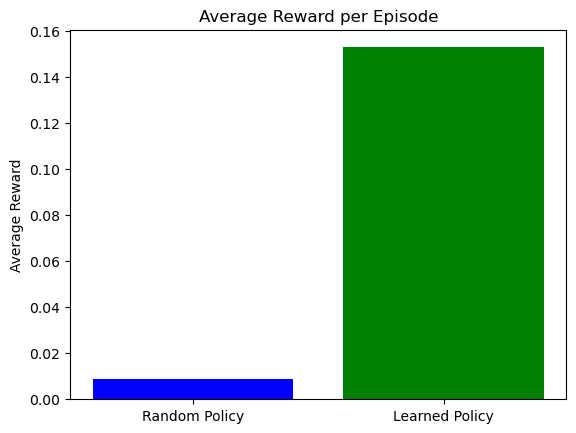

In [38]:
#Q-learning evaluation
import numpy as np
import matplotlib.pyplot as plt
avg_random_reward = np.mean(reward_per_random_episode)
avg_learned_reward = np.mean(reward_per_learned_episode)
plt.bar(
    ['Random Policy', 'Learned Policy'],
    [avg_random_reward, avg_learned_reward],
    color=['blue', 'green']
)
plt.title('Average Reward per Episode')
plt.ylabel('Average Reward')
plt.show()


# Chapter 4: Advanced Stategies in Model-Free RL

## Expected SARSA

In [39]:
# Implementation with Frozen Lake
env = gym.make('FrozenLake-v1', is_slippery=False)
num_states = env.observation_space.n
num_actions = env.action_space.n
Q = np.zeros((num_states, num_actions))
gamma = 0.99
alpha = 0.1
num_episodes = 1000

In [40]:
# Expected SARSA update rule
def update_q_table(state, action, next_state, reward):
    expected_q = np.mean(Q[next_state])
    Q[state, action] = (1-alpha) * Q[state, action] + alpha * (reward + gamma * expected_q)

In [ ]:
# Training
for i in range(num_episodes):
    state, info = env.reset()
    terminated = False
    while not terminated:
        action = env.action_space.sample()
        next_state, reward, terminated, truncated, info = env.step(action)
        update_q_table(state, action, next_state, reward)
        state = next_state

# Agent's policy
policy = {state: np.argmax(Q[state]) for state in range(num_states)}
print(policy)

## Double Q-learning

In [ ]:
# Implementation with Frozen Lake
env = gym.make('FrozenLake-v1', is_slippery=False)
num_states = env.observation_space.n
n_actions = env.action_space.n
Q = [np.zeros((num_states, n_actions))] * 2
num_episodes = 1000
alpha = 0.5
gamma = 0.99

In [ ]:
# Implementing update_q_tables()
def update_q_tables(state, action, reward, next_state):
    # Select a random Q-table index (0 or 1)
    i = np.random.randint(2)
    # Update the corresponding Q-table
    best_next_action = np.argmax(Q[i][next_state])
    Q[i][state, action] = (1 - alpha) * Q[i][state, action] + alpha * (reward + gamma * Q[1-i][next_state, best_next_action])

# Training
for episode in range(num_episodes):
    state, info = env.reset()
    terminated = False
    while not terminated:
        action = np.random.choice(n_actions)
        next_state, reward, terminated, truncated, info = env.step(action)
        update_q_tables(state, action, reward, next_state)
        state = next_state
        
final_Q = (Q[0] + Q[1])/2
# OR
final_Q = Q[0] + Q[1]

In [ ]:
# Agent's policy
policy = {state: np.argmax(final_Q[state]) for state in range(num_states)}
print(policy)

## Expected SARSA

In [ ]:
# Balancing exploration and exploitation

# Implementation with Frozen Lake
env = gym.make('FrozenLake', is_slippery=True)
action_size = env.action_space.n
state_size = env.observation_space.n
Q = np.zeros((state_size, action_size))
alpha = 0.1
gamma = 0.99
total_episodes = 10000

In [ ]:
#Implementing epsilon_greedy()
def epsilon_greedy(state):
    if np.random.rand() < epsilon: # Explore
        action = env.action_space.sample()
    else: # Exploit
        action = np.argmax(Q[state, :])
    return action

In [ ]:
#Training epsilon-greedy
epsilon = 0.9

# Exploration rate
rewards_eps_greedy = []

for episode in range(total_episodes):
    state, info = env.reset()
    terminated = False
    episode_reward = 0
    while not terminated:
        action = epsilon_greedy(state)
        new_state, reward, terminated, truncated, info = env.step(action)
        Q[state, action] = update_q_table(state, action, new_state) # NOTE (JS): This is probably wrong, no need to return and reward is not passed as an argument
        state = new_state
        episode_reward += reward
    rewards_eps_greedy.append(episode_reward)

In [ ]:
#Training decayed epsilon-greedy
epsilon = 1.0

# Exploration rate

epsilon_decay = 0.999
min_epsilon = 0.01
rewards_decay_eps_greedy = []
for episode in range(total_episodes):
    state, info = env.reset()
    terminated = False
    episode_reward = 0
    while not terminated:
        action = epsilon_greedy(state)
        new_state, reward, terminated, truncated, info = env.step(action)
        episode_reward += reward
        Q[state, action] = update_q_table(state, action, new_state) # NOTE (JS): This is probably wrong, no need to return and reward is not passed as an argument
        state = new_state
    rewards_decay_eps_greedy.append(episode_reward)
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

In [ ]:
#Comparing strategies
avg_eps_greedy= np.mean(rewards_eps_greedy)
avg_decay = np.mean(rewards_decay_eps_greedy)
plt.bar(['Epsilon Greedy', 'Decayed Epsilon Greedy'],
[avg_eps_greedy, avg_decay],
color=['blue', 'green'])
plt.title('Average Reward per Episode')
plt.ylabel('Average Reward')
plt.show()

In [ ]:
Multi-armed bandits
Gambler facing slot machines
Challenge → maximize winning
Solution → exploration-exploitation

Slot machines

Reward from an arm is 0 or 1
Agent's goal → Accumulate maximum reward

Solving the problem
Decayed epsilon-greedy
Epsilon → select random machine

Solving the problem
Decayed epsilon-greedy
Epsilon → select random machine
1 - epsilon → select best machine so far
Epsilon decreases over time

In [ ]:
# Initialization
n_bandits = 4
true_bandit_probs = np.random.rand(n_bandits)
n_iterations = 100000
epsilon = 1.0
min_epsilon = 0.01
epsilon_decay = 0.999
counts = np.zeros(n_bandits)

# How many times each bandit was played
values = np.zeros(n_bandits)

# Estimated winning probability of each bandit
rewards = np.zeros(n_iterations)

# Reward history
selected_arms = np.zeros(n_iterations, dtype=int)

# Arm selection history

In [ ]:
# Interaction loop
for i in range(n_iterations):
arm = epsilon_greedy()
reward = np.random.rand() < true_bandit_probs[arm]
rewards[i] = reward
selected_arms[i] = arm
counts[arm] += 1
values[arm] += (reward - values[arm]) / counts[arm]
epsilon = max(min_epsilon, epsilon * epsilon_decay)

In [ ]:
# Analyzing selections
selections_percentage = np.zeros((n_iterations, n_bandits))

# Analyzing selections
selections_percentage = np.zeros((n_iterations, n_bandits))
for i in range(n_iterations):
selections_percentage[i, selected_arms[i]] = 1

# Analyzing selections
selections_percentage = np.zeros((n_iterations, n_bandits))
for i in range(n_iterations):
selections_percentage[i, selected_arms[i]] = 1
selections_percentage = np.cumsum(selections_percentage, axis=0) /
np.arange(1, n_iterations + 1).reshape(-1, 1)



In [ ]:
# Analyzing selections
for arm in range(n_bandits):
plt.plot(selections_percentage[:, arm], label=f'Bandit #{arm+1}')
plt.xscale('log')
plt.title('Bandit Action Choices Over Time')
plt.xlabel('Episode Number')
plt.ylabel('Percentage of Bandit Selections (%)')
plt.legend()
plt.show()
for i, prob in enumerate(true_bandit_probs, 1):
print(f"Bandit #{i} -> {prob:.2f}")

# Bandit #1 -> 0.37
# Bandit #2 -> 0.95
# Bandit #3 -> 0.73
# Bandit #4 -> 0.60